In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings

### Load the data

In [4]:
output_file=r"../data/synthetic_data_baseline_prompt.csv"

def load_data(output_file, latency_file=None):
    """Load the CSV files."""
    df_output = pd.read_csv(output_file)
    
    if latency_file:
        df_latency = pd.read_csv(latency_file)
    else:
        df_latency = None
    
    print("=== DATA OVERVIEW ===")
    print(f"Total records: {len(df_output)}")
    print(f"Total users: {df_output['user_id'].nunique()}")
    print(f"Actions: {sorted(df_output['rl_action'].unique())}\n")
    
    return df_output, df_latency

# %%
def parse_ratings(rating_str):
    """Parse rating string to list."""
    try:
        ratings = ast.literal_eval(rating_str)
        return ratings if ratings else []
    except:
        return []

def prepare_rating_data_for_boxplot(df):
    """Prepare rating data for boxplot visualization."""
    rating_data = []
    
    for _, row in df.iterrows():
        ratings = parse_ratings(row['actual_rating'])
        action = row['rl_action']
        
        for rating in ratings:
            rating_data.append({
                'action': action,
                'rating': rating
            })
    
    return pd.DataFrame(rating_data)

In [6]:
latency_file = None  

df_output, df_latency = load_data(output_file, latency_file)
df_output['parsed_ratings'] = df_output['actual_rating'].apply(parse_ratings)

df_output_paresed = prepare_rating_data_for_boxplot(df_output)

=== DATA OVERVIEW ===
Total records: 9000
Total users: 100
Actions: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]



## Create a Line Plot for the actiosn

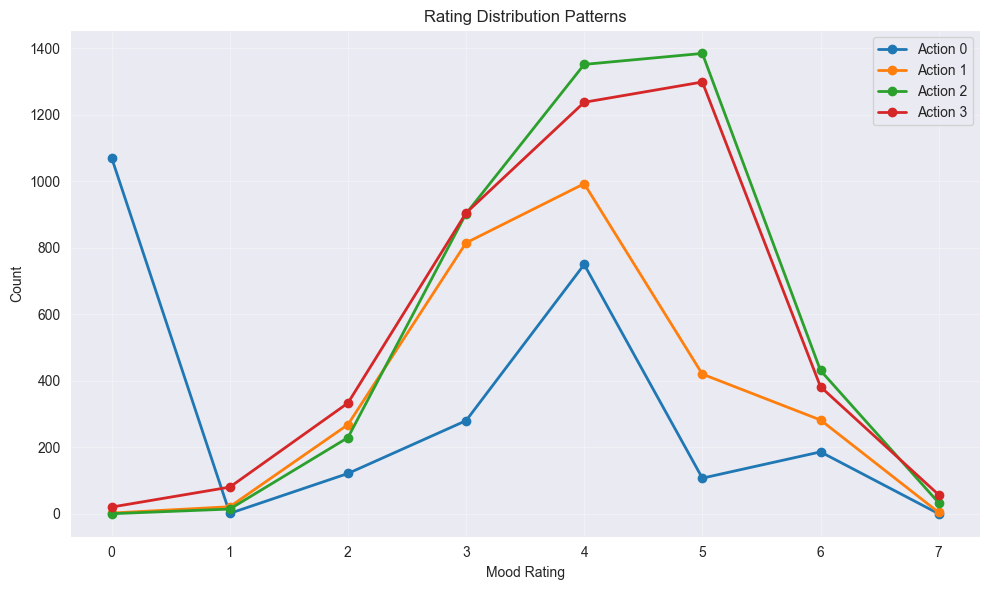

In [7]:
def create_rating_distribution_lineplot(df, figsize=(10, 6)):
    """
    Create a line plot showing rating distribution patterns for each action.
    """
    plot_data = []
    
    for action in sorted(df['rl_action'].unique()):
        action_df = df[df['rl_action'] == action]
        rating_counts = {i: 0 for i in range(8)}  # Ratings 0-7
        
        for _, row in action_df.iterrows():
            ratings = row['parsed_ratings']
            for rating in ratings:
                if 0 <= rating <= 7:
                    rating_counts[rating] += 1
        
        plot_data.append([rating_counts[i] for i in range(8)])
    
    # DataFrame für Plot erstellen
    plot_df = pd.DataFrame(plot_data, 
                          index=sorted(df['rl_action'].unique()),
                          columns=range(8))
    
    # Plot erstellen
    plt.figure(figsize=figsize)
    
    for action in plot_df.index:
        plt.plot(range(8), plot_df.loc[action], 
                marker='o', linewidth=2, label=f'Action {action}')
    
    plt.title('Rating Distribution Patterns')
    plt.xlabel('Mood Rating')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

create_rating_distribution_lineplot(df_output)


## Investigate the average reward per action

In [32]:
# load the training split data
path_full_train = r"../data/synthetic_data_splits/full_train_df_scaled_.csv"
path_full_val_df = r"../data/synthetic_data_splits/full_val_df_scaled.csv"

df_train_synthetic = pd.read_csv(path_full_train)

In [33]:
def list_action_mean_rewards(df):
    """List mean reward for each action."""
    action_avg_rewards = {}

    for action in sorted(df['action'].unique()):
        action_data = df[df['action'] == action]
        all_rewards = action_data['reward'].tolist()

        if all_rewards:
            avg_reward = np.mean(all_rewards)
            action_avg_rewards[action] = avg_reward
            print(f"Action {action}: Mean Reward = {avg_reward:.3f} (n={len(all_rewards)} rewards)")
        else:
            print(f"Action {action}: No valid rewards found")

    return action_avg_rewards

action_avg_rewards = list_action_mean_rewards(df_train_synthetic)

Action 0: Mean Reward = 1.418 (n=1711 rewards)
Action 1: Mean Reward = 1.867 (n=1675 rewards)
Action 2: Mean Reward = 2.180 (n=1674 rewards)
Action 3: Mean Reward = 2.278 (n=1690 rewards)
